# Setup

In [ ]:
import tensorflow as tf           # Tensorflow
import numpy as np                # Numpy
import matplotlib                # Matplotlib
import matplotlib.pyplot as plt   # Pyplot
import imageio
import os
from matplotlib import cm
# Versions:
print("TensorFlow: ", tf.__version__)           # Tensorflow version
print("Numpy     : ", np.__version__)                # Numpy Version
print("Matplotlib: ", matplotlib.__version__)   # Matplotlib version

TensorFlow:  2.19.0
Numpy     :  2.0.2
Matplotlib:  3.10.0


# Hyperparameters

In [ ]:
T   = 100             # String tension [N]
mu  = 1               # String linear density [kg/m]
L   = 1               # String legnht [m]
d = 0.1               # String pluck point [m]
h = 0.1               # String pluck height [m]
Tf = 1                # Simulation time [s]
N_data = 1000         # Number of data trainning points
N_pde = 7000          # Number of pde trainning points
N_bc = 2000            # Number of boundary condition trainning points
N_ic = 1000            # Number of initial conditions trainning points
lambda_data = 1000*0       # Data loss weight
lambda_pde = 0.1        # PDE loss weight
lambda_bc = 600      # Boundary condition loss weight
lambda_ic = 100       # Initial condition loss weight
gif = 0

# Derivated parameters

10.0


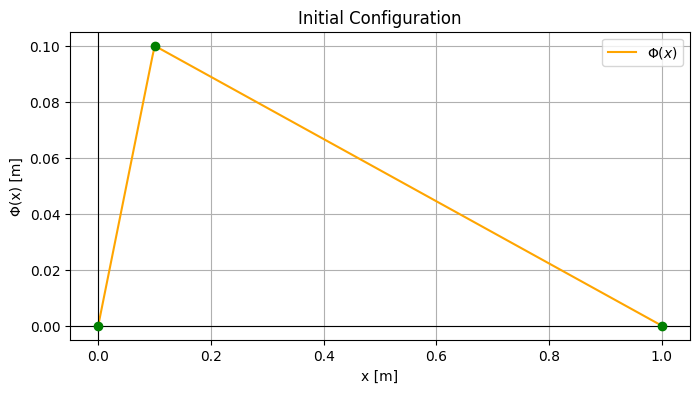

In [ ]:
c = np.sqrt(T/mu)           # Evaluated velocity [m/s]
print(c)

def Phi(x): # String's initial configuration [m]
  phi = np.zeros_like(x, dtype=np.float32) # Response array [m]
  phi[x <= d] = h/d*x[x <= d] # Before the pluck point
  phi[x > d] = h - h/(L-d) * (x[x > d] - d) # After the pluck point
  return phi # Return the vertical configuration array

def Psi(x): # Sitring's initial velocity configuration [m/s]:
  psi = np.zeros_like(x, dtype=np.float32) # Response array [m/s]
  return psi # Return the initial velocity configuration array

# Initial configuration plot:
x_vals = np.linspace(0, L, 250) # Values for x axis
phi_vals = Phi(x_vals) # Evaluate the initial configuration
plt.figure(figsize=(8,4)) # Figure
plt.plot(x_vals, phi_vals, label=r"$\Phi(x)$", color="orange")
plt.axhline(0, color="k", linewidth=0.8)
plt.axvline(0, color="k", linewidth=0.8)
plt.scatter([0, d, L], [0, h, 0], color="green", zorder=5)
plt.title("Initial Configuration")
plt.xlabel("x [m]")
plt.ylabel("Φ(x) [m]")
plt.legend()
plt.grid(True)
plt.show()

# Analytical Solution

/tmp/ipython-input-1778871675.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  A[n-1] = (2/L) * np.trapz(Int_A, x) # An
/tmp/ipython-input-1778871675.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  B[n-1] = (2/L) * np.trapz(Int_B, x) # Bn


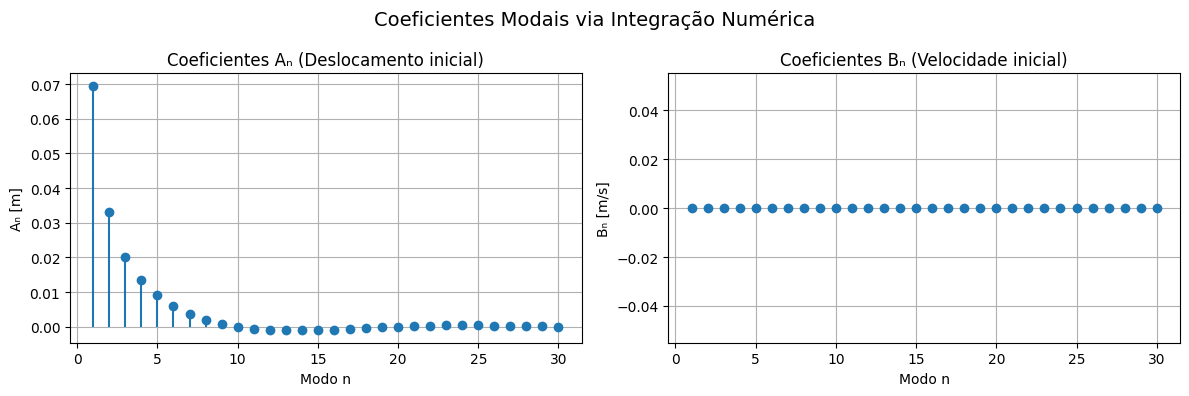

In [ ]:
def Coeficients(N, n_points = 2000): # Function to calculate the coeficientes An and Bn
  x = np.linspace(0, L, n_points) # Evaluated points
  phi = Phi(x) # Initial postion
  psi = Psi(x) # Initial speed
  A = np.zeros(N, dtype=np.float32)  # An coeficients
  B = np.zeros(N, dtype=np.float32)  # Bn coeficients
  for n in range(1, N+1):
    Int_A = phi * np.sin(n*np.pi*x/L) # Integrand for A
    A[n-1] = (2/L) * np.trapz(Int_A, x) # An
    Int_B = psi * np.sin(n*np.pi*x/L) # Integrand for A
    B[n-1] = (2/L) * np.trapz(Int_B, x) # Bn
  return A, B

def U_xt(x, t, A, B):
    u = np.zeros_like(x)
    N = len(An)
    for n in range(1, N+1):
        wn = n*np.pi*c/L
        u += (A[n-1]*np.cos(wn*t) + B[n-1]*np.sin(wn*t)) * np.sin(n*np.pi*x/L)
    return u

N = 30
An, Bn = Coeficients(N)

x_vals = np.linspace(0, L, 200)
# Espectrum coeficients
fig, axs = plt.subplots(1, 2, figsize=(12,4))

axs[0].stem(range(1, N+1), An, basefmt=" ")
axs[0].set_title("Coeficientes Aₙ (Deslocamento inicial)")
axs[0].set_xlabel("Modo n")
axs[0].set_ylabel("Aₙ [m]")
axs[0].grid()

axs[1].stem(range(1, N+1), Bn, basefmt=" ")
axs[1].set_title("Coeficientes Bₙ (Velocidade inicial)")
axs[1].set_xlabel("Modo n")
axs[1].set_ylabel("Bₙ [m/s]")
axs[1].grid()

plt.suptitle("Coeficientes Modais via Integração Numérica", fontsize=14)
plt.tight_layout()
plt.show()

# Gif generation
if gif == 1:
  n_frames = 100       # número de quadros
  t_max = 3         # simular 50 ms
  t_vals = np.linspace(0, t_max, n_frames)
  frames = []
  os.makedirs("frames", exist_ok=True)
  for i, t in enumerate(t_vals):
      u_vals = U_xt(x_vals, t, An, Bn)
      plt.figure(figsize=(8,4))
      plt.plot(x_vals, u_vals, color="orange")
      plt.ylim(-1.2*h, 1.2*h)
      plt.xlabel("x [m]")
      plt.ylabel("u(x,t) [m]")
      plt.title(f"Corda vibrando – t={t*1000:.1f} ms")
      plt.grid()
      fname = f"frames/frame_{i:03d}.png"
      plt.savefig(fname)
      plt.close()
      frames.append(imageio.imread(fname))
  imageio.mimsave("corda_vibrando.gif", frames, duration=0.05)
  print("GIF 'corda_vibrando.gif' gerado!")


#N = 40
#An, Bn = Coeficients(N)

#nx = 150   # pontos em x
#nt = 300   # pontos em t
#t_max = 0.05  # simular até 50 ms

#x_vals = np.linspace(0, L, nx)
#t_vals = np.linspace(0, t_max, nt)

#U = np.zeros((nt, nx))

#for i, t in enumerate(t_vals):
#    U[i, :] = u(x_vals, t, An, Bn)

#plt.figure(figsize=(10,5))
#plt.pcolormesh(x_vals, t_vals*1000, U, shading='auto', cmap='RdBu_r')
#plt.colorbar(label="u(x,t) [m]")
#plt.xlabel("x [m]")
#plt.ylabel("t [ms]")
#plt.title("Mapa espaço-tempo do deslocamento da corda u(x,t)")
#plt.show()


# Trainig Points

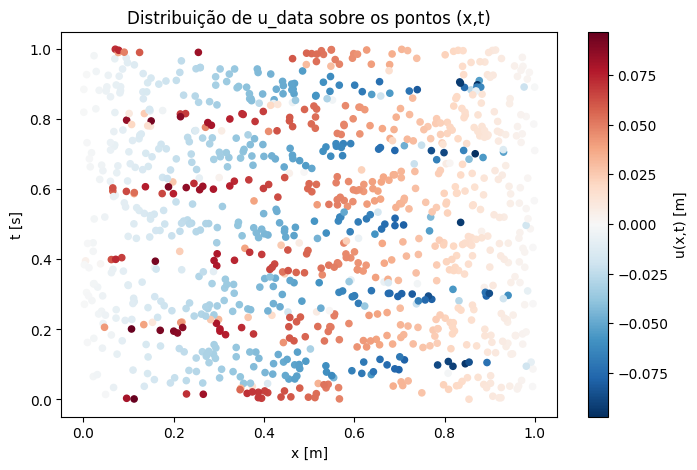

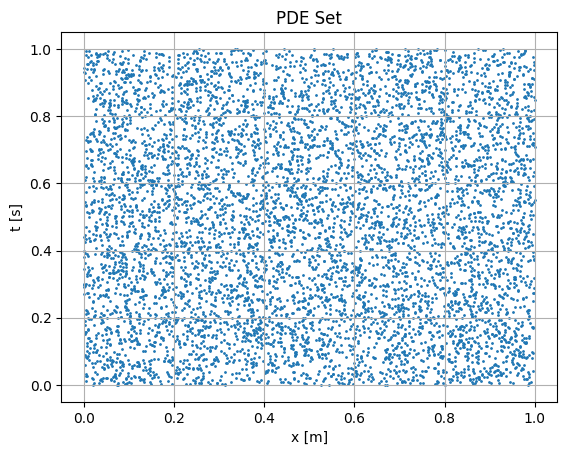

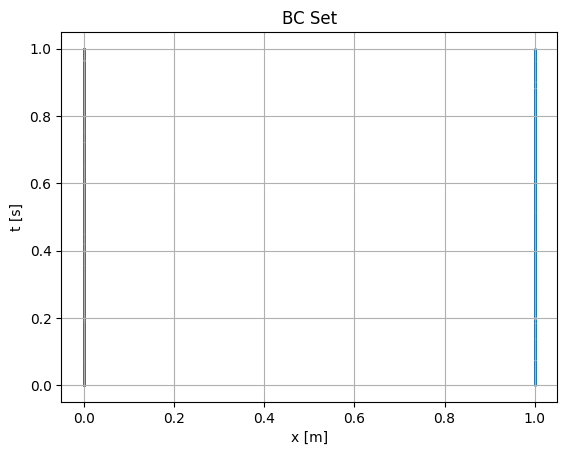

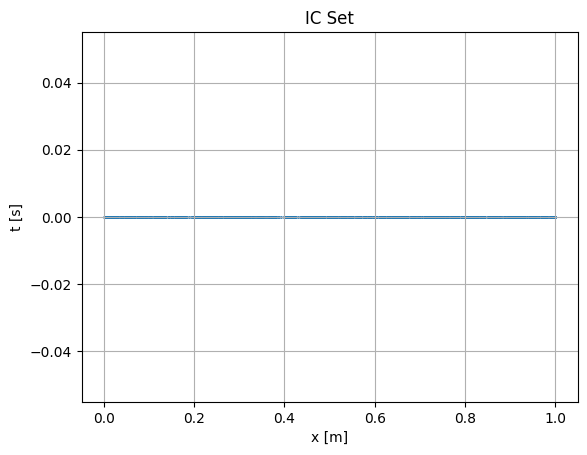

In [ ]:
# -------------------- Begin Function and Procedures ------------------------------------
def Plot_data_points(xt_points, set_name): # Procedure to plot the data training points
  plt.figure()
  plt.scatter(xt_points[:,0], xt_points[:,1], s=1)
  plt.title(set_name)
  plt.xlabel("x [m]")
  plt.ylabel("t [s]")
  plt.grid(True)
# ----------------- End Functions and Procedures ------------------------------------------
# --------------------- Begin Code --------------------------------------------
# Data points:
x_data = np.random.uniform(0, L, N_data) # x axis data points
t_data = np.random.uniform(0, Tf, N_data) # t axis data points
u_data = U_xt(x_data, t_data, An, Bn).reshape(-1, 1) # u data points
u_data_tf = tf.convert_to_tensor(u_data, dtype=tf.float32) # Casting to tensors:
xt_data = np.stack([x_data, t_data], axis=1)       # (x, t) data set points
xt_data_tf = tf.convert_to_tensor(xt_data, dtype=tf.float32) # Casting to tensors:
#Plot_data_points(xt_data, "Data Set") # Plot the data set
plt.figure(figsize=(8,5))
plt.scatter(x_data, t_data, c=u_data.flatten(), cmap='RdBu_r', s=20)
plt.colorbar(label="u(x,t) [m]")
plt.xlabel("x [m]")
plt.ylabel("t [s]")
plt.title("Distribuição de u_data sobre os pontos (x,t)")
plt.show()
# PDE:
x_pde = np.random.uniform(0, L, N_pde)      # x axis points
t_pde = np.random.uniform(0, Tf, N_pde)      # t axis points
xt_pde = np.stack([x_pde, t_pde], axis=1)   # (x, t) meshed points
xt_pde_tf = tf.convert_to_tensor(xt_pde, dtype=tf.float32) # Casting to tensors:
Plot_data_points(xt_pde, "PDE Set") # Plot the PDE set
# BC:
nbc = N_bc // 2 # 2 boundary conditions
x0 = np.zeros((nbc, 1))    # x = 0
xL = L*np.ones((nbc, 1))    # x = L
xt_bc_1 = np.hstack( [x0, np.random.uniform(0, Tf, (nbc, 1))] )   # (0, t)
xt_bc_2 = np.hstack( [xL, np.random.uniform(0, Tf, (nbc, 1))] )  # (L, t)
xt_bc = np.vstack( [xt_bc_1, xt_bc_2] ) # Pontos das bordas
Plot_data_points(xt_bc, "BC Set") # Plot the PDE set
xt_bc_tf = tf.convert_to_tensor(xt_bc, dtype=tf.float32) # Casting to tensor
# Initial conditions:
x_ic = np.random.uniform(0, L, N_ic)      # x axis points
t_ic = np.zeros_like(x_ic)                   # t axis points
xt_ic = np.stack([x_ic, t_ic], axis=1)   # (x, t) meshed points
Plot_data_points(xt_ic, "IC Set")
phi_initial = Phi(x_ic)
psi_initial = Psi(x_ic)
xt_ic_tf = tf.convert_to_tensor(xt_ic, dtype=tf.float32)
phi_initial_tf = tf.convert_to_tensor(phi_initial.reshape(-1, 1), dtype=tf.float32)
psi_initial_tf = tf.convert_to_tensor(psi_initial.reshape(-1, 1), dtype=tf.float32)
# ----------------- End Code ------------------------------------------


# PINN

In [ ]:
class PINN(tf.keras.Model):
  def __init__(self, n_hidden_layers, n_neurons):
    super(PINN, self).__init__()
    self.hidden = [ tf.keras.layers.Dense( n_neurons, activation=tf.math.tanh) for _ in range(n_hidden_layers)] # Hidden layers
    self.out = tf.keras.layers.Dense(1, activation=None, dtype = tf.float32) # Output layer

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    return self.out(x)
# Instantiate the model:
model = PINN( n_hidden_layers=8, n_neurons=128) # 5 hidden layers, 64 neurons per layer
# Model information:
#model.build(input_shape=(None, 2))  # Input dimension = 2
#model.summary()

# Loss

In [ ]:
def residue(model, xt): # Calcultates de PDE Residue
  with tf.GradientTape(persistent=True) as tape2:
    tape2.watch(xt)
    with tf.GradientTape(persistent=True) as tape1:
      tape1.watch(xt)
      u = model(xt) # Predicted u
    grad = tape1.gradient(u, xt)  # [du/dx, du/dt]
    du_dx = grad[:, 0:1]
    du_dt = grad[:, 1:2]
    d2u_dx2 = tape2.gradient(du_dx, xt)[:, 0:1]
    d2u_dt2 = tape2.gradient(du_dt, xt)[:, 1:2]
    del tape1
    del tape2
  res = d2u_dt2 - c*c*d2u_dx2
  return res

def loss_bc(model, xt_bc_tf):
  u_pred = model(xt_bc_tf)
  return tf.reduce_mean(lambda_bc * tf.square(u_pred))

def loss_ic(model, xt_ic_tf, phi_tf, psi_tf):
  with tf.GradientTape() as tape:
    tape.watch(xt_ic_tf)
    u_pred = model(xt_ic_tf)
  du = tape.gradient(u_pred, xt_ic_tf)
  du_dt_pred = du[:, 1:2]
  loss_phi = tf.reduce_mean(lambda_ic * tf.square(u_pred - phi_tf))
  loss_psi = tf.reduce_mean(lambda_ic * tf.square(du_dt_pred - psi_tf))
  return loss_phi + loss_psi

def loss(model, xt_dataset, xt_pde, xt_bc, xt_ic, phi_tf, psi_tf):
  res = residue(model, xt_pde) # Calculates the PDE residue
  loss_pde_val = tf.reduce_mean(lambda_pde * tf.square(res)) # Computate the pde loss
  loss_bc_val = loss_bc(model, xt_bc)
  loss_ic_val = loss_ic(model, xt_ic, phi_tf, psi_tf)
  loss_data = tf.reduce_mean(lambda_data*tf.square(model(xt_data_tf) - u_data_tf)) # Calculates the data loss
  total_loss = loss_pde_val + loss_bc_val + loss_ic_val + loss_data
  return loss_pde_val, loss_data, loss_bc_val, loss_ic_val, total_loss

# Trainning

In [ ]:
@tf.function # Compiles in a tensorflow graph to performance
def train_step(model, xt_dataset, xt_pde, xt_bc, xt_ic, phi_tf, psi_tf, optimizer):
  with tf.GradientTape() as tape:
    loss_pde, loss_data, loss_bc, loss_ic_val, total_loss = loss(model, xt_dataset, xt_pde, xt_bc, xt_ic, phi_tf, psi_tf)
  grads = tape.gradient(total_loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
  return loss_pde, loss_data, loss_bc, loss_ic_val, total_loss

epochs = 100_000
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate)
loss_history = [] # Loss history
for epoch in range(epochs):
    lpde, ldata, lbc, lic, tl = train_step(model, xt_data_tf, xt_pde_tf, xt_bc_tf, xt_ic_tf, phi_initial_tf, psi_initial_tf, optimizer)
    loss_history.append(tl) # Log total loss
    if epoch % 500 == 0 or epoch == epochs-1:
      print(f"Epoch {epoch}, PDE Loss: {lpde.numpy():.5f}, Data Loss: {ldata.numpy():.5f}, BC Loss: {lbc.numpy():.5f}, IC Loss: {lic.numpy():.5f}, Total Loss: {tl.numpy():.5f}")


Epoch 0, PDE Loss: 0.23311, Data Loss: 0.00000, BC Loss: 5.60251, IC Loss: 3.59004, Total Loss: 9.42566
Epoch 500, PDE Loss: 0.00060, Data Loss: 0.00000, BC Loss: 0.03557, IC Loss: 0.22468, Total Loss: 0.26085
Epoch 1000, PDE Loss: 0.00059, Data Loss: 0.00000, BC Loss: 0.04537, IC Loss: 0.20867, Total Loss: 0.25463
Epoch 1500, PDE Loss: 0.00480, Data Loss: 0.00000, BC Loss: 0.09722, IC Loss: 0.18550, Total Loss: 0.28752
Epoch 2000, PDE Loss: 0.07563, Data Loss: 0.00000, BC Loss: 0.54685, IC Loss: 0.23917, Total Loss: 0.86165
Epoch 2500, PDE Loss: 0.00095, Data Loss: 0.00000, BC Loss: 0.04827, IC Loss: 0.19730, Total Loss: 0.24652
Epoch 3000, PDE Loss: 0.00095, Data Loss: 0.00000, BC Loss: 0.04954, IC Loss: 0.20080, Total Loss: 0.25129
Epoch 3500, PDE Loss: 0.00052, Data Loss: 0.00000, BC Loss: 0.03689, IC Loss: 0.21746, Total Loss: 0.25487
Epoch 4000, PDE Loss: 0.00079, Data Loss: 0.00000, BC Loss: 0.05722, IC Loss: 0.16446, Total Loss: 0.22247
Epoch 4500, PDE Loss: 0.00030, Data Loss:

# Results

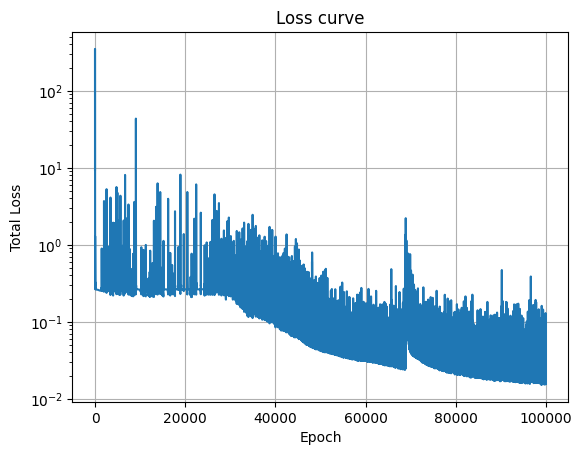

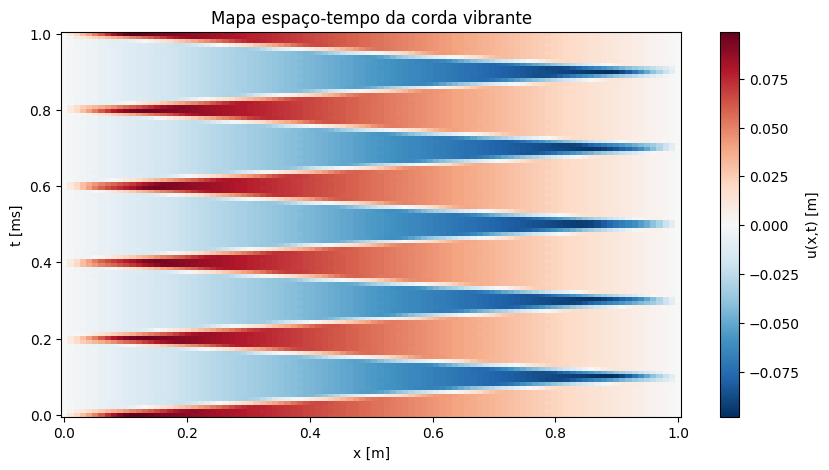

/tmp/ipython-input-1778871675.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  A[n-1] = (2/L) * np.trapz(Int_A, x) # An
/tmp/ipython-input-1778871675.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  B[n-1] = (2/L) * np.trapz(Int_B, x) # Bn


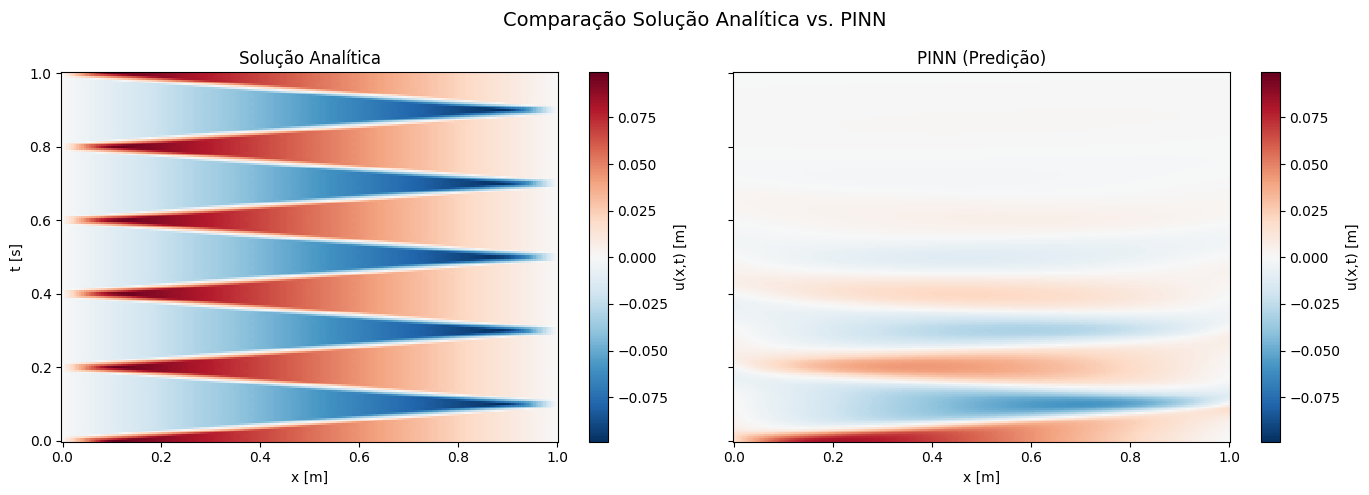

In [ ]:
# Loss curve:
plt.figure()
plt.plot(loss_history)
plt.title("Loss curve")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.yscale("log")
plt.grid(True)
plt.show()


x_vals = np.linspace(0, L, 100)
t_vals = np.linspace(0, Tf, 100)  # 10 ms
U_vals = np.zeros((len(t_vals), len(x_vals)))

for i, ti in enumerate(t_vals):
    U_vals[i, :] = U_xt(x_vals, ti, An, Bn)

# --- Gráfico 2D ---
plt.figure(figsize=(10,5))
plt.pcolormesh(x_vals, t_vals, U_vals,
               shading='auto', cmap='RdBu_r')  # azul=negativo, vermelho=positivo
plt.colorbar(label="u(x,t) [m]")
plt.xlabel("x [m]")
plt.ylabel("t [ms]")
plt.title("Mapa espaço-tempo da corda vibrante")
plt.show()
# Analytical solution x PINN Predicition
#Hz_pred_tf = model(xy_tf)
#Hz_pred = Hz_pred_tf.numpy().flatten()

#Nx, Ny = 200, 200  # resolução da imagem
#x_grid = np.linspace(0, a, Nx)
#y_grid = np.linspace(0, b, Ny)
#X, Y = np.meshgrid(x_grid, y_grid)
#xy_grid = np.stack([X.flatten(), Y.flatten()], axis=1)  # shape: (Nx*Ny, 2)
# Anakytical solution:
#Hz_true_grid = Hz_analytical(X.flatten(), Y.flatten()).reshape(Ny, Nx)

# PINN predction:
#xy_grid_tf = tf.convert_to_tensor(xy_grid, dtype=tf.float32)
#Hz_pred_grid = model(xy_grid_tf).numpy().reshape(Ny, Nx)
#plt.figure(figsize=(12, 5))

# Solução analítica
#plt.subplot(1, 2, 1)
#plt.imshow(Hz_true_grid, extent=[0, a, 0, b], origin='lower', cmap='viridis', aspect='auto')
#plt.colorbar(label="Hz_true")
#plt.title("Analytical Solution")
#plt.xlabel("x [m]")
#plt.ylabel("y [m]")

# Previsão do modelo
#plt.subplot(1, 2, 2)
#plt.imshow(Hz_pred_grid, extent=[0, a, 0, b], origin='lower', cmap='viridis', aspect='auto')
#plt.colorbar(label="Hz_pred")
#plt.title("PINN Prediction")
#plt.xlabel("x [m]")
#plt.ylabel("y [m]")

#plt.tight_layout()
#plt.show()
# Absolute error:
#Hz_error_grid = np.abs(Hz_true_grid - Hz_pred_grid)

#plt.figure()
#plt.imshow(Hz_error_grid, extent=[0, a, 0, b], origin='lower', cmap='hot', aspect='auto')
#plt.colorbar(label="Absolute Error")
#plt.title("Prediction Error")
#plt.xlabel("x [m]")
#plt.ylabel("y [m]")
#plt.tight_layout()
#plt.show()

# --- Geração do grid de comparação ---
nx = 200
nt = 200
x_vals = np.linspace(0, L, nx)
t_vals = np.linspace(0, Tf, nt)

X, Tm = np.meshgrid(x_vals, t_vals)
XT = np.column_stack([X.flatten(), Tm.flatten()])  # shape (nx*nt, 2)
XT_tf = tf.convert_to_tensor(XT, dtype=tf.float32)

# --- Avalia PINN ---
u_pinn_pred = model(XT_tf).numpy().reshape(nt, nx)

# --- Avalia solução analítica ---
N = 30
An, Bn = Coeficients(N)
U_analytic = np.zeros_like(X)
for i, ti in enumerate(t_vals):
    U_analytic[i, :] = U_xt(x_vals, ti, An, Bn)

# --- Gráfico comparativo ---
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

pcm1 = axs[0].pcolormesh(x_vals, t_vals, U_analytic,
                         shading='auto', cmap='RdBu_r')
axs[0].set_title("Solução Analítica")
axs[0].set_xlabel("x [m]")
axs[0].set_ylabel("t [s]")
fig.colorbar(pcm1, ax=axs[0], label="u(x,t) [m]")

pcm2 = axs[1].pcolormesh(x_vals, t_vals, u_pinn_pred,
                         shading='auto', cmap='RdBu_r',
                         vmin=U_analytic.min(), vmax=U_analytic.max())
axs[1].set_title("PINN (Predição)")
axs[1].set_xlabel("x [m]")
fig.colorbar(pcm2, ax=axs[1], label="u(x,t) [m]")

plt.suptitle("Comparação Solução Analítica vs. PINN", fontsize=14)
plt.tight_layout()
plt.show()